## Car Price Prediction Project
This dataset contains information about used cars.This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The data contains the following columns:

1. Name
2. Year
3. Selling_Price
4. Km_Driven
5. Fuel
6. Seller_type
7. Transmission
8. Owner

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv('../dataset/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Dataset Understanding

In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

**Calculate the value counts of the object data type columns**

In [7]:
df.Fuel_Type.value_counts(normalize=True)

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

In [8]:
df.Seller_Type.value_counts(normalize=True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

In [9]:
df.Transmission.value_counts(normalize=True)

Manual       0.86711
Automatic    0.13289
Name: Transmission, dtype: float64

**Create a new column named no_of_years that stores difference between the current year and car's buying year**

In [10]:
from datetime import date
df['Current_Year'] = date.today().year
df['No_of_years'] = df['Current_Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


**Dropping unwanted columns from the DataFrame**

In [11]:
df.drop(['Car_Name','Year','Current_Year'],axis = 1,inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


**Frequency Encoding**

In [12]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)
    
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    frequency_encoding(df, col)

df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,239,195,261,0,7
1,4.75,9.54,43000,60,195,261,0,8
2,7.25,9.85,6900,239,195,261,0,4
3,2.85,4.15,5200,239,195,261,0,10
4,4.60,6.87,42450,60,195,261,0,7


**Checking For Missing Values**

In [13]:
df.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
No_of_years      0
dtype: int64

In [14]:
df.notna().sum()

Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
No_of_years      301
dtype: int64

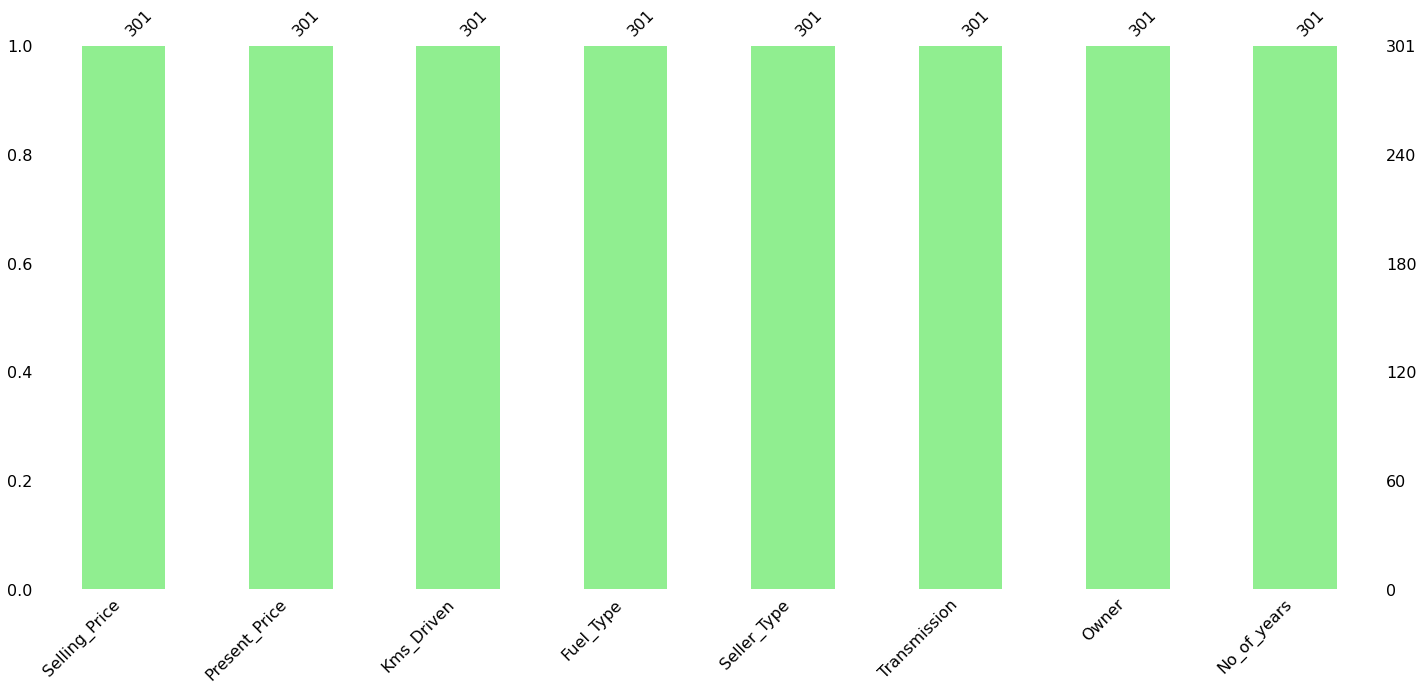

In [15]:
msno.bar(df, color="lightgreen")
plt.show()

**Summary statistics of the DataFrame** 

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301.0,201.744186,73.416876,2.00,239.0,239.0,239.0,239.0
Seller_Type,301.0,163.657807,42.581050,106.00,106.0,195.0,195.0,195.0
Transmission,301.0,231.631229,75.144751,40.00,261.0,261.0,261.0,261.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
No_of_years,301.0,7.372093,2.891554,3.00,5.0,7.0,9.0,18.0


## Data Visualization

In [17]:
def plot_categorial(var):
    fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(14,10))
    df[var].value_counts().plot.pie(autopct='%.0f%%',labels=df[var].unique(),shadow = True,
                               startangle = 180,ax=ax[0][0])

    df[var].value_counts().plot.bar(ax=ax[0][1])
    sns.boxplot(x = df[var], y = df.Selling_Price, ax=ax[1][0])
    sns.stripplot(x = df[var], y = df.Selling_Price, ax=ax[1][1])
    fig.suptitle(var.title())
    plt.show()

In [18]:
def plot_numerical(var):
    fig, axes = plt.subplots(ncols=2, figsize=(14,5))
    sns.histplot(x = df[var], ax = axes[0])
    sns.kdeplot(x = df[var], ax = axes[1], fill=True)
    plt.suptitle(var.title())
    plt.show()

In [19]:
def plot_kde(var, by):
    facet = sns.FacetGrid(df, hue=by,aspect=4,palette='bright')
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

In [20]:
numerical_columns = ['Selling_Price', 'Present_Price', 'Kms_Driven']

In [21]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

### Categorical Columns

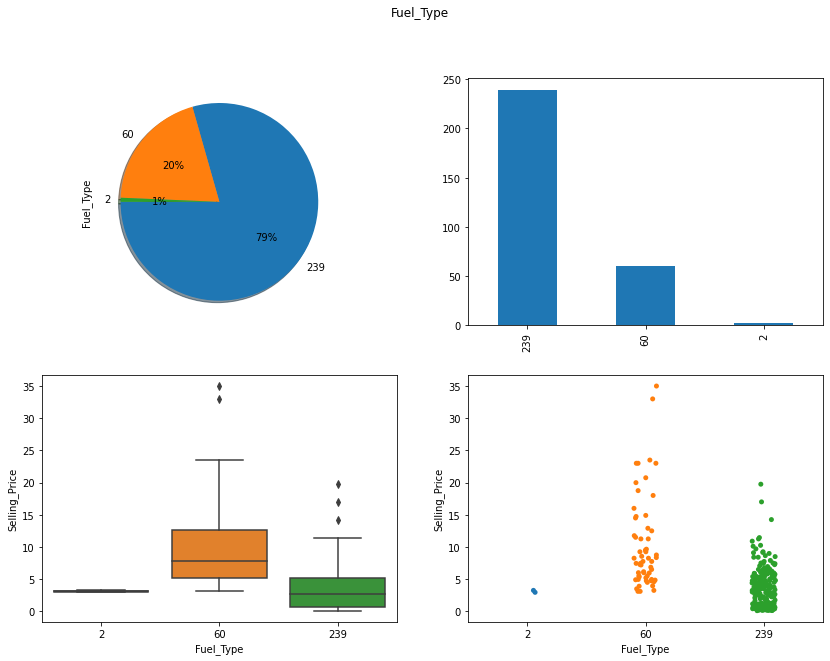

In [22]:
plot_categorial(categorical_columns[0])

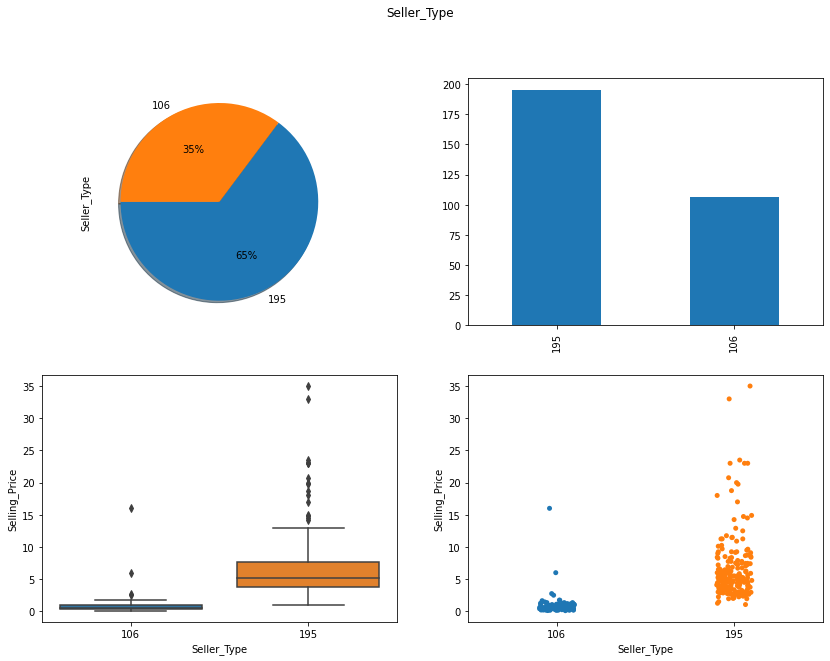

In [23]:
plot_categorial(categorical_columns[1])

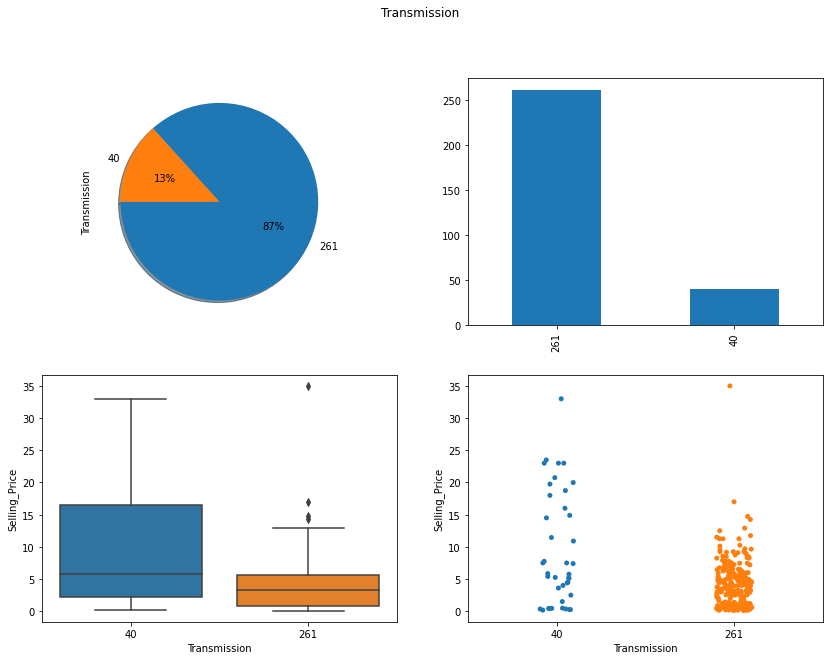

In [24]:
plot_categorial(categorical_columns[2])

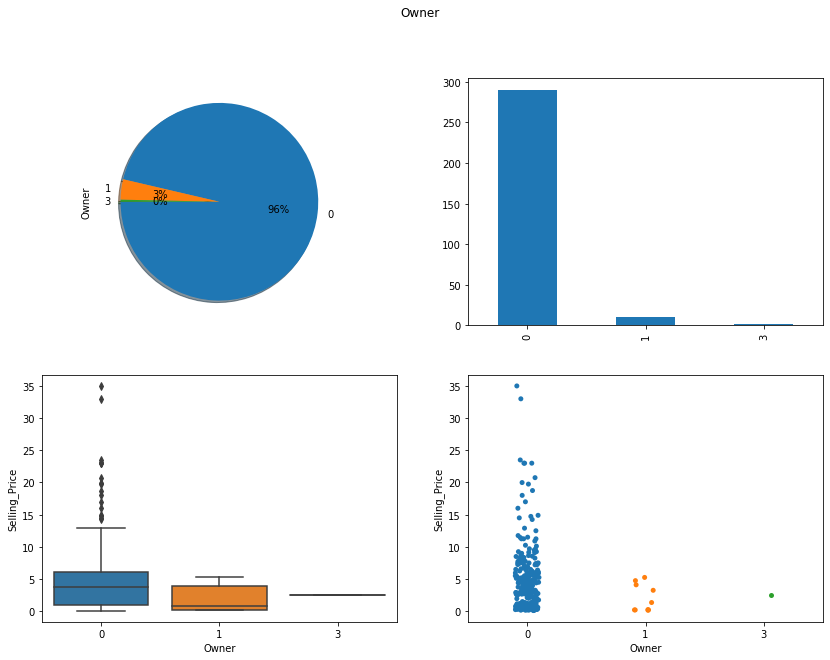

In [25]:
plot_categorial(categorical_columns[3])

### Numerical Columns

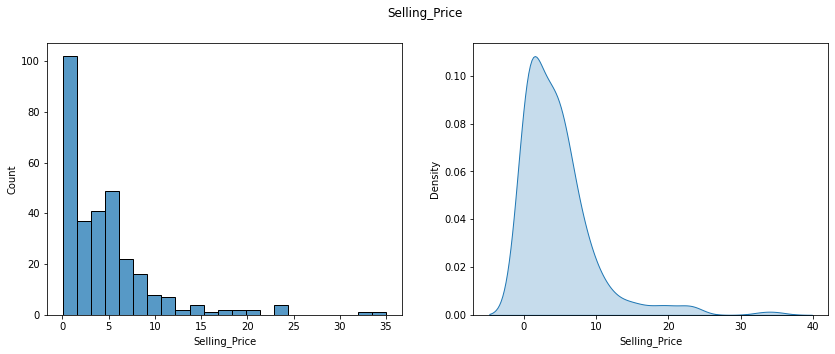

In [26]:
plot_numerical(numerical_columns[0])

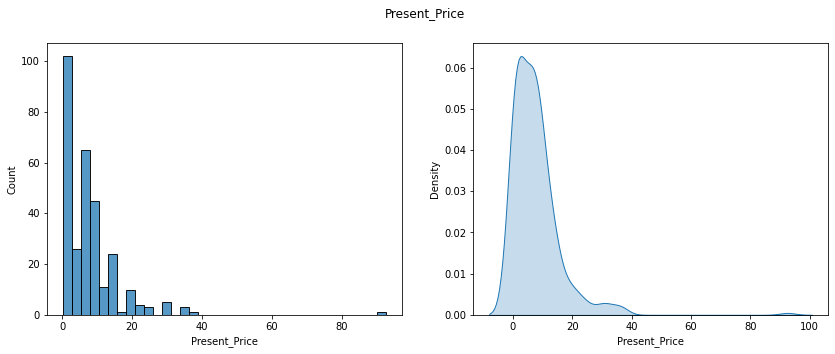

In [27]:
plot_numerical(numerical_columns[1])

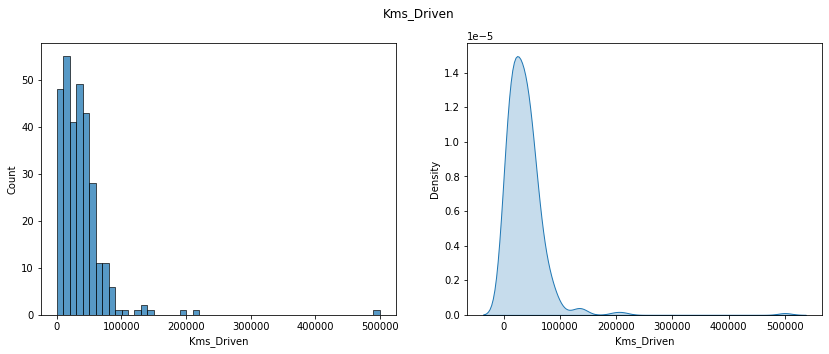

In [28]:
plot_numerical(numerical_columns[2])

### Kernel Density Estimation

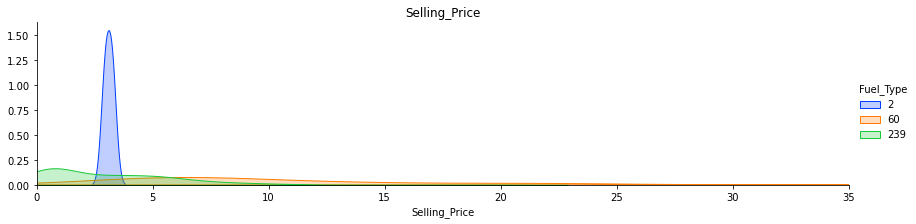

In [29]:
plot_kde(numerical_columns[0], 'Fuel_Type')

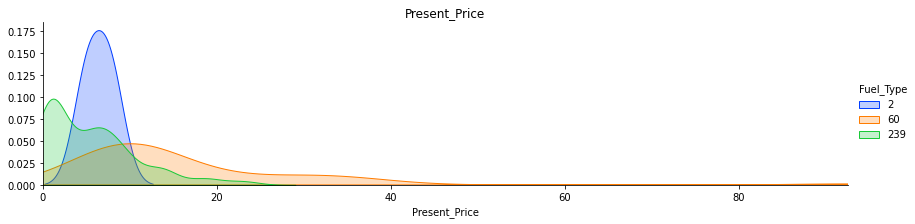

In [30]:
plot_kde(numerical_columns[1], 'Fuel_Type')

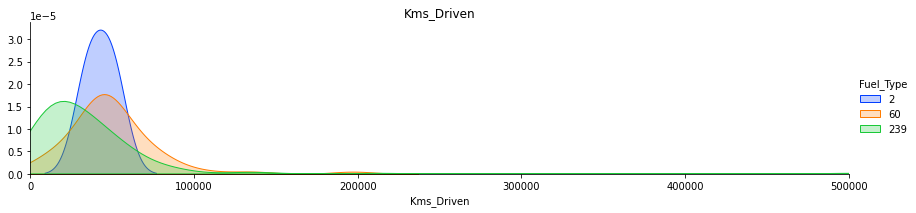

In [31]:
plot_kde(numerical_columns[2], 'Fuel_Type')

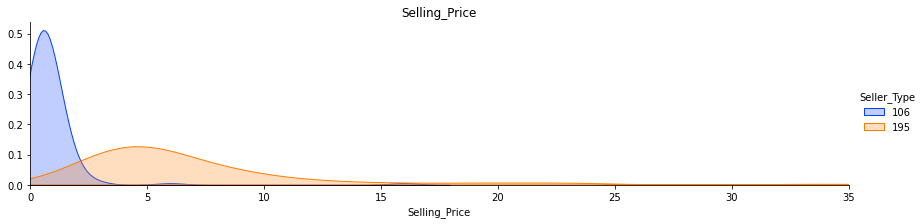

In [32]:
plot_kde(numerical_columns[0], 'Seller_Type')

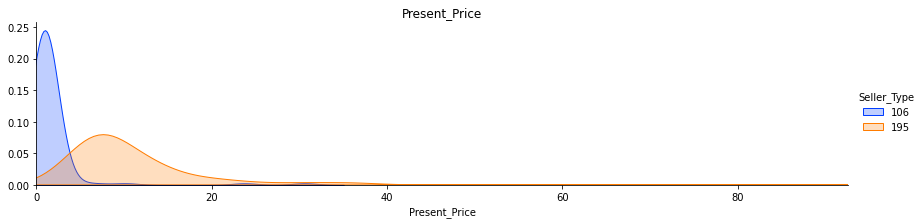

In [33]:
plot_kde(numerical_columns[1], 'Seller_Type')

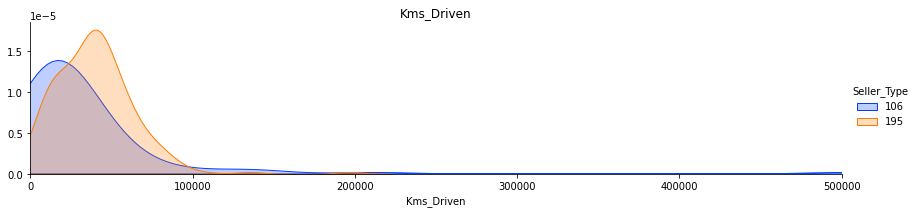

In [34]:
plot_kde(numerical_columns[2], 'Seller_Type'
        )

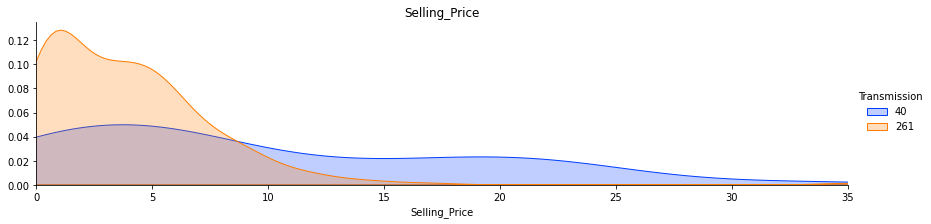

In [35]:
plot_kde(numerical_columns[0],'Transmission')

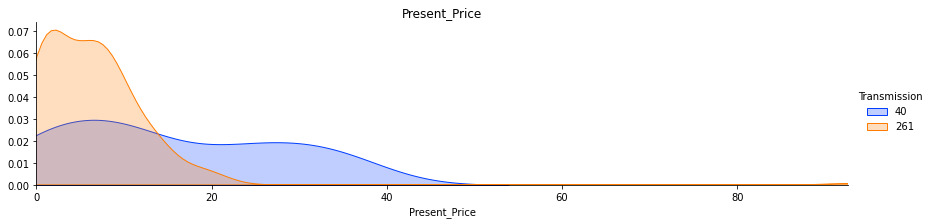

In [36]:
plot_kde(numerical_columns[1], 'Transmission')

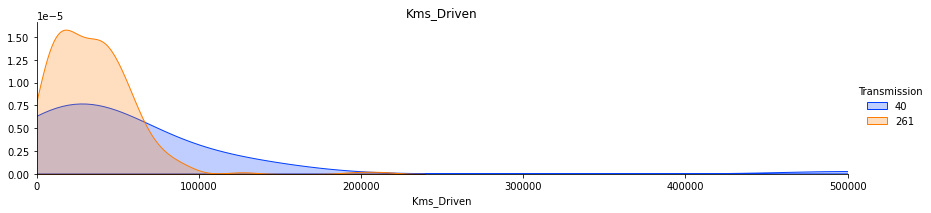

In [37]:
plot_kde(numerical_columns[2], 'Transmission')

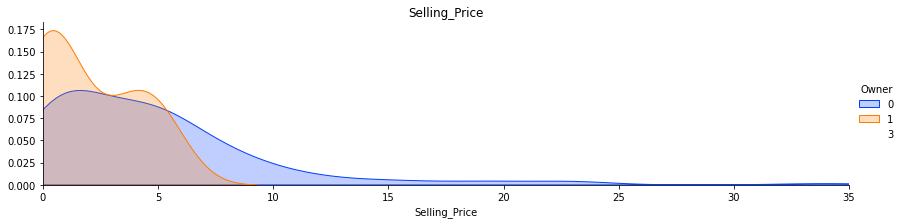

In [38]:
plot_kde(numerical_columns[0], 'Owner')

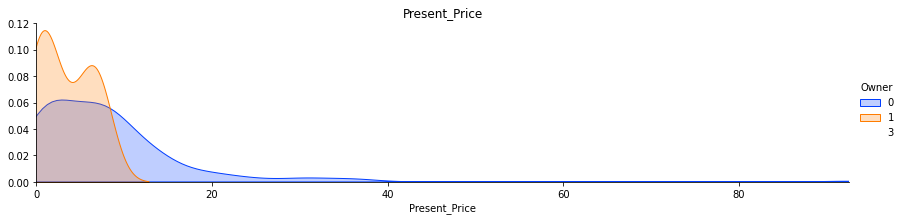

In [39]:
plot_kde(numerical_columns[1], 'Owner')

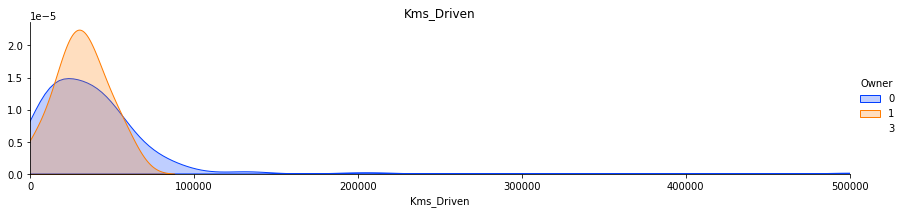

In [40]:
plot_kde(numerical_columns[2], 'Owner')

### Relational Plots

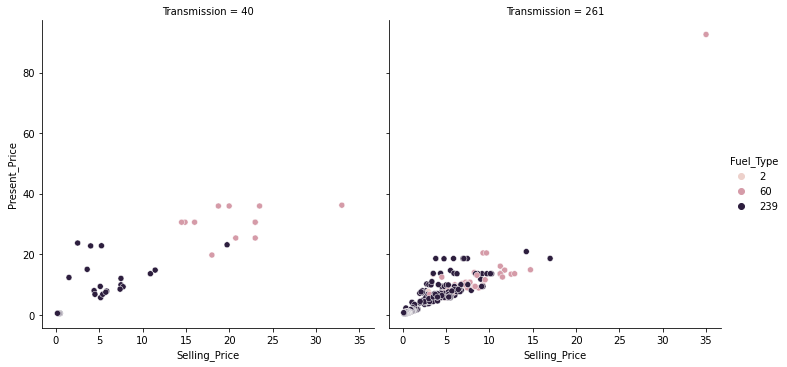

In [41]:
sns.relplot(x=df.Selling_Price, y=df.Present_Price, hue=df.Fuel_Type, col=df.Transmission)
plt.show()

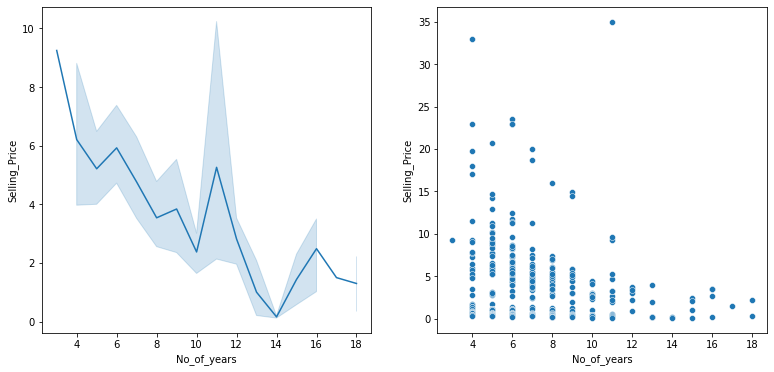

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(13,6))
sns.lineplot(x='No_of_years',y='Selling_Price',data=df, ax=axes[0])
sns.scatterplot(x='No_of_years',y='Selling_Price',data=df, ax=axes[1])
plt.show()

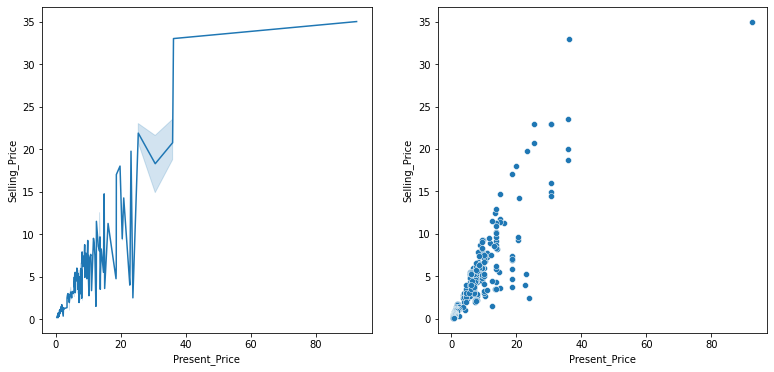

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(13,6))
sns.lineplot(x='Present_Price',y='Selling_Price',data=df, ax=axes[0])
sns.scatterplot(x='Present_Price',y='Selling_Price',data=df, ax=axes[1])
plt.show()

### Regression Plots

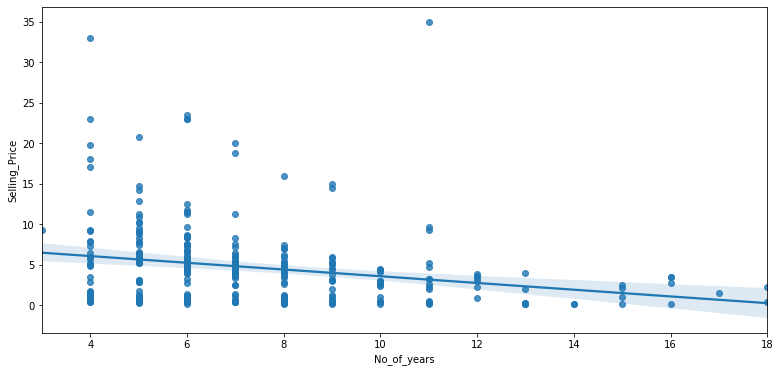

In [44]:
plt.figure(figsize=(13,6))
sns.regplot(x='No_of_years', y='Selling_Price', data=df)
plt.show()

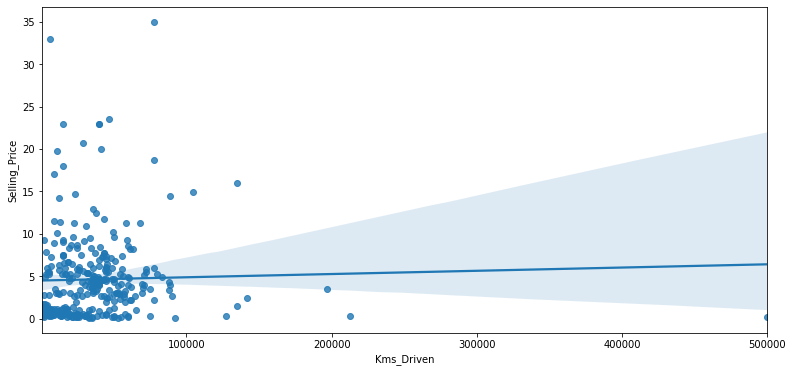

In [45]:
plt.figure(figsize=(13,6))
sns.regplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.show()

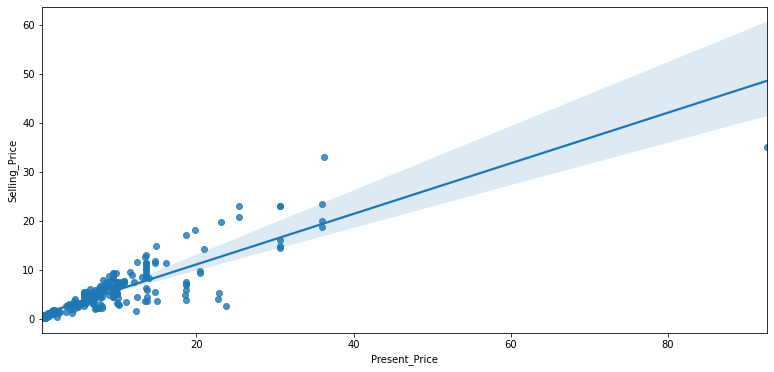

In [46]:
plt.figure(figsize=(13,6))
sns.regplot(x='Present_Price', y='Selling_Price', data=df)
plt.show()

### Correlation Heatmaps

In [47]:
resign_corr = df.corr()
resign_corr.T

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.532283,0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.458764,0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.171526,0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.532283,-0.458764,-0.171526,1.000000,-0.357776,0.087831,0.055917,0.058076
Seller_Type,0.550724,0.512030,0.101419,-0.357776,1.000000,-0.063240,-0.124269,-0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.087831,-0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055917,-0.124269,-0.050316,1.000000,0.182104
No_of_years,-0.236141,0.047584,0.524342,0.058076,-0.039896,-0.000394,0.182104,1.000000


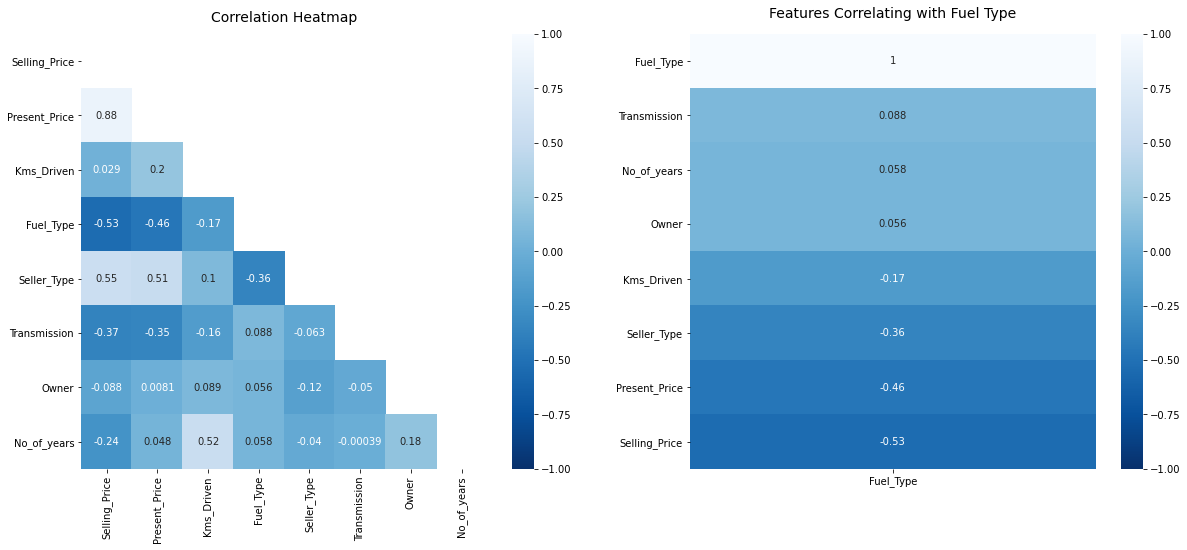

In [48]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True,ax=ax[0], cmap='Blues_r')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

heatmap = sns.heatmap(resign_corr[['Fuel_Type']].sort_values(by='Fuel_Type', ascending=False),
                      vmin=-1, vmax=1, annot=True, ax=ax[1], cmap='Blues_r')
heatmap.set_title('Features Correlating with Fuel Type', fontdict={'fontsize':14}, pad=16)
plt.show()

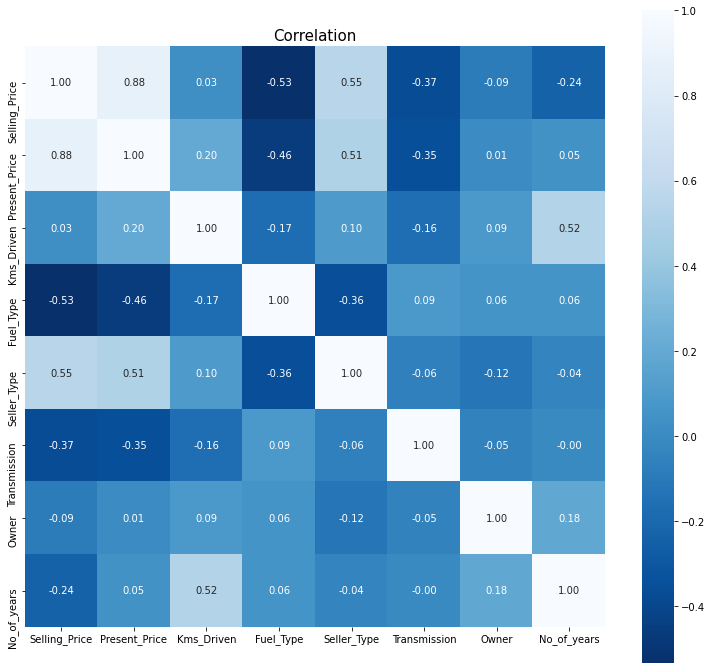

In [49]:
plt.figure(figsize=(13,12))
sns.heatmap(resign_corr, annot=True, fmt =".2f",square=True ,cmap='Blues_r')
plt.title("Correlation", size = 15)
plt.show()

### Pairwise Relationships

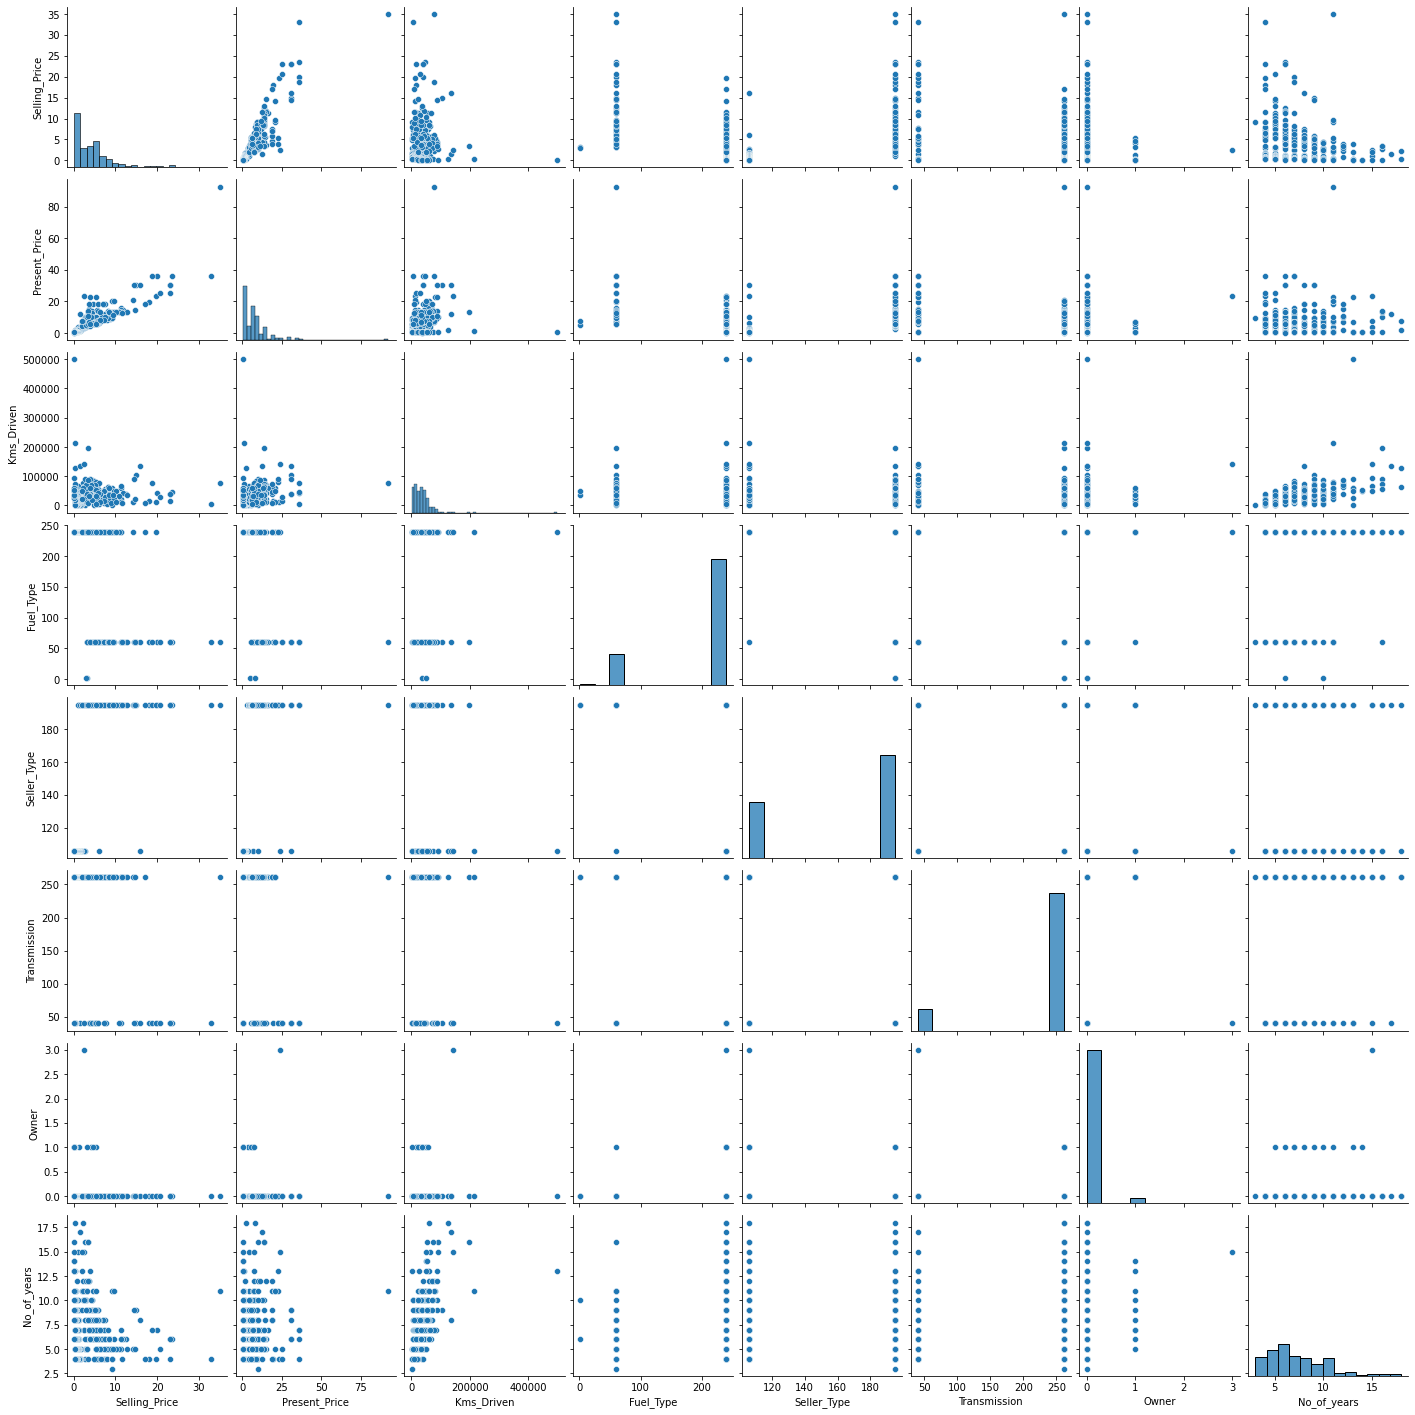

In [50]:
sns.pairplot(df)
plt.show()

## Data Splitting

In [51]:
from yellowbrick.target import FeatureCorrelation
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [52]:
X = df.drop(['Selling_Price'],axis = 1)
y = df['Selling_Price']

In [53]:
X[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,5.59,27000,239,195,261,0,7
1,9.54,43000,60,195,261,0,8
2,9.85,6900,239,195,261,0,4
3,4.15,5200,239,195,261,0,10
4,6.87,42450,60,195,261,0,7


In [54]:
y[:5]

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
X_train[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
74,8.93,83000,60,195,261,0,7
239,4.43,23709,239,195,261,0,9
64,36.23,6000,60,195,40,0,4
294,6.80,33019,239,195,261,0,7
286,7.90,28569,239,195,261,0,5


In [57]:
y_train[:5]

74      4.90
239     2.00
64     33.00
294     3.75
286     5.65
Name: Selling_Price, dtype: float64

In [58]:
X_test[:5]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
223,9.400,61381,60,195,261,0,6
150,0.826,6000,239,106,261,0,10
226,5.700,24678,239,195,261,0,6
296,11.600,33988,60,195,261,0,5
52,19.770,15000,60,195,40,0,4


In [59]:
y_test[:5]

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
Name: Selling_Price, dtype: float64

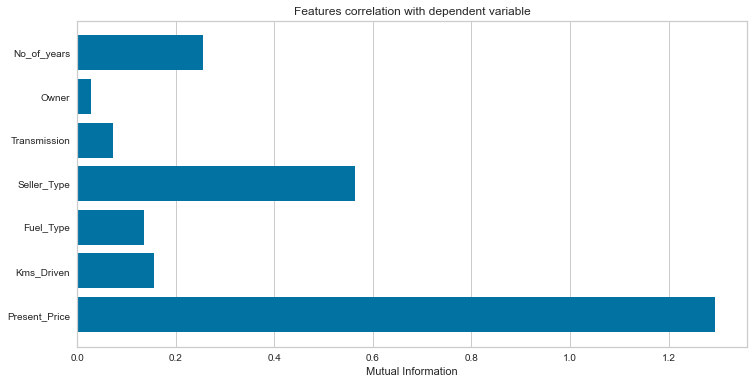

In [60]:
plt.figure(figsize=(12,6))
visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels= X.columns)
visualizer.fit(X, y)        
visualizer.show()
plt.show()

## Model Building

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = rf_reg.predict(X_test)
y_train_pred = rf_reg.predict(X_train)

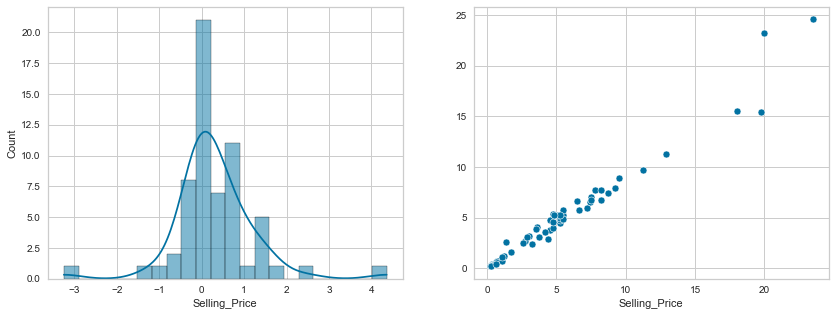

In [63]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot(x = y_test - y_pred, ax = axes[0], kde=True)
sns.scatterplot(x = y_test, y = y_pred, ax = axes[1])
plt.show()

#### Prediction Error 

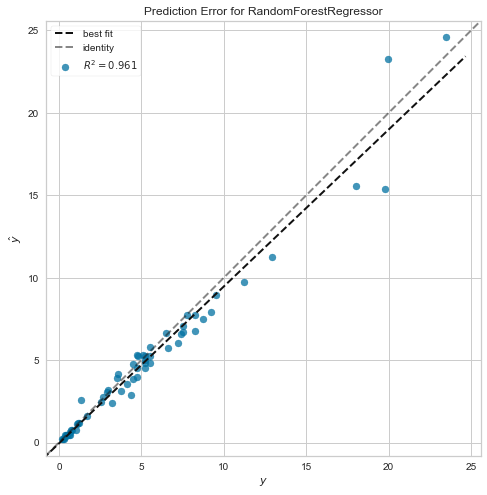

In [64]:
plt.figure(figsize=(16, 8))
visualizer = PredictionError(rf_reg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

#### Residuals Plot

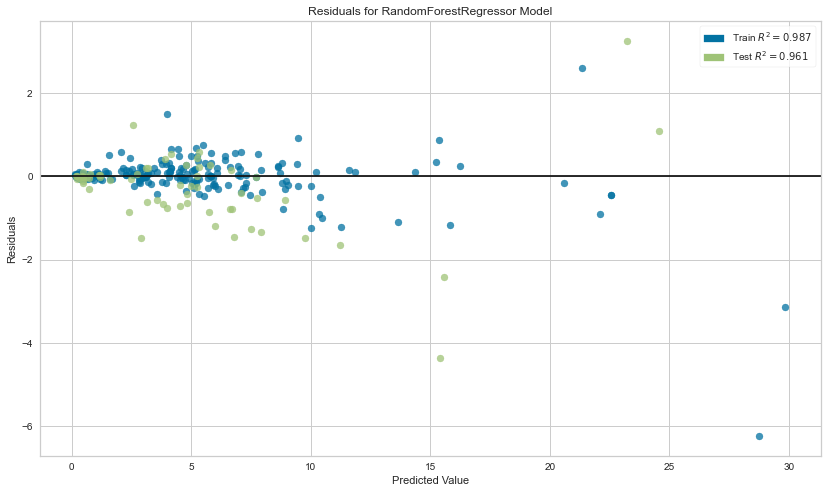

In [65]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_reg, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

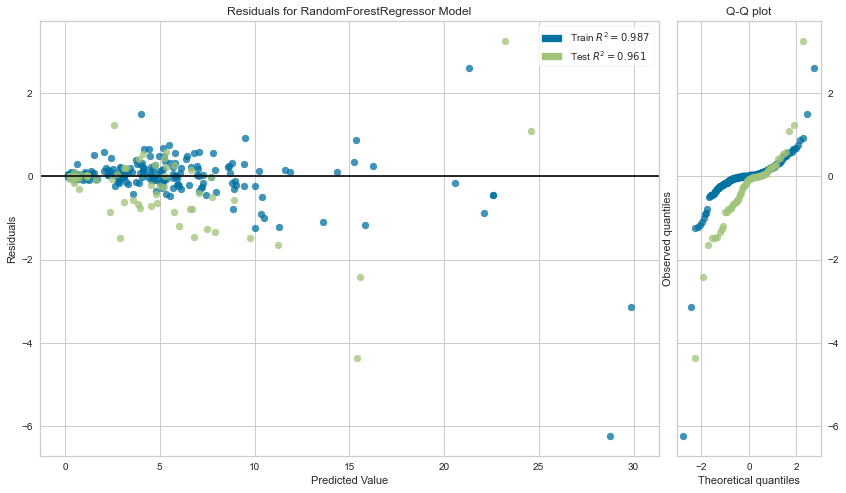

In [66]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_reg, qqplot=True, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

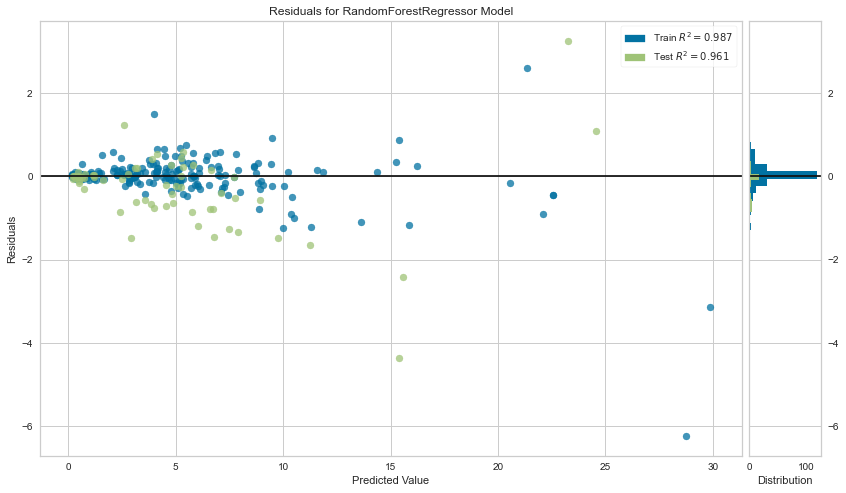

In [67]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_reg, hist=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

In [68]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) * 100
    accuracy = explained_variance_score(true, predicted) * 100
    return mae, mse, rmse, r2_square, accuracy

rf_df = pd.DataFrame(data=[["Test Set", rf_reg.__class__.__name__, *evaluate(y_train, y_train_pred)], 
                           ["Train Set", rf_reg.__class__.__name__, *evaluate(y_test, y_pred)]] ,
                    columns=['Dataset','Model Name','MAE','MSE','RMSE','R2 square','Explained Variance Score'])
rf_df                 

,Dataset,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,Test Set,RandomForestRegressor,0.235628,0.328301,0.572975,98.726080,98.726653
1,Train Set,RandomForestRegressor,0.601589,0.985391,0.992669,96.101677,96.463899


### RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
y_pred = rf_random.predict(X_test)

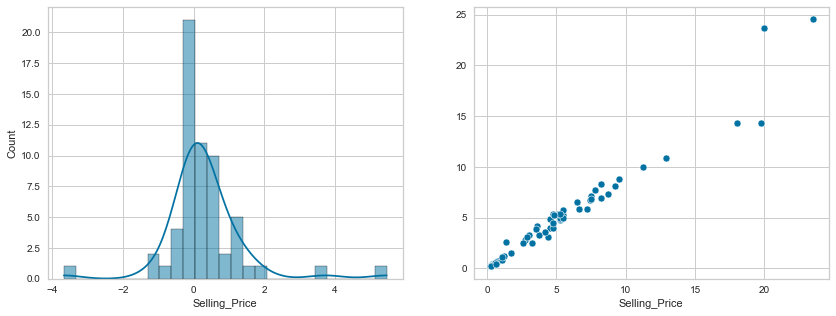

In [72]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot(x = y_test - y_pred, ax = axes[0], kde=True)
sns.scatterplot(x = y_test, y = y_pred, ax = axes[1])
plt.show()

#### Prediction Error 

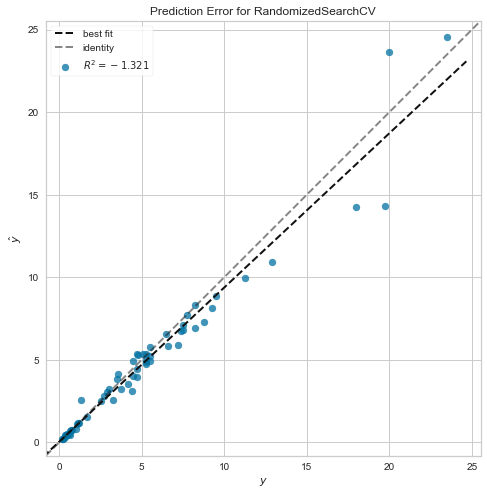

In [73]:
plt.figure(figsize=(16, 8))
visualizer = PredictionError(rf_random)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

#### Residuals Plot

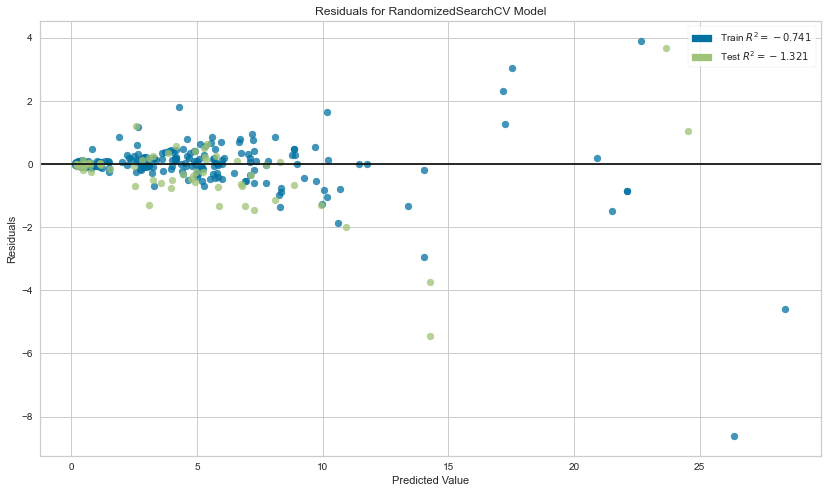

In [74]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_random, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

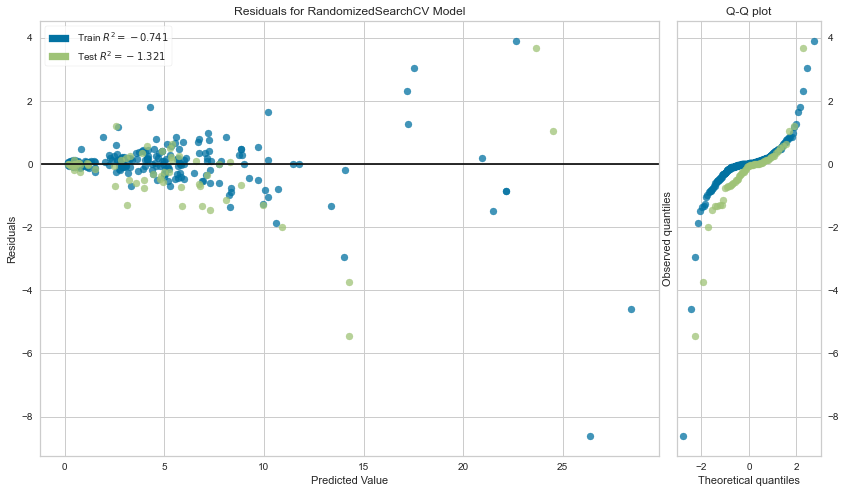

In [75]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_random, qqplot=True, hist=False)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

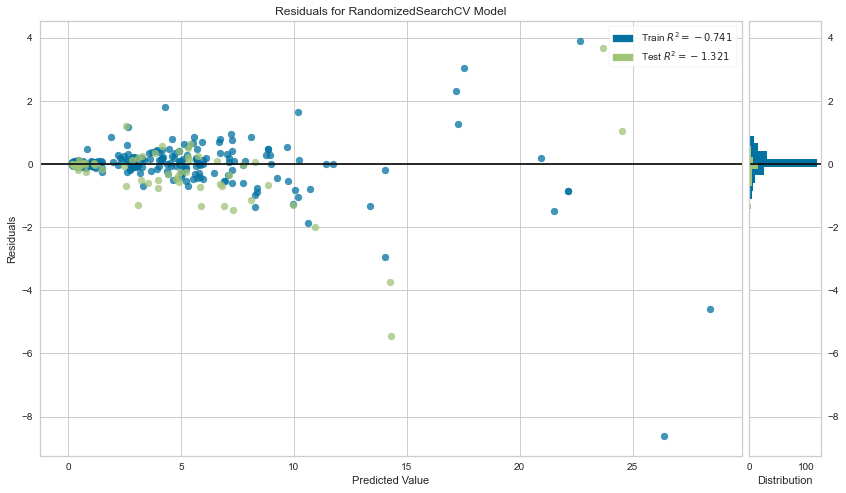

In [76]:
plt.figure(figsize=(14, 8))
visualizer = ResidualsPlot(rf_random, hist=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()
plt.show()

In [77]:
random_df = pd.DataFrame(data=[["Test Set", rf_random.__class__.__name__, *evaluate(y_train, y_train_pred)], 
                               ["Train Set", rf_random.__class__.__name__, *evaluate(y_test, y_pred)]] ,
                         columns=['Dataset','Model Name','MAE','MSE','RMSE','R2 square','Explained Variance Score'])
random_df

,Dataset,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,Test Set,RandomizedSearchCV,0.235628,0.328301,0.572975,98.72608,98.726653
1,Train Set,RandomizedSearchCV,0.629200,1.320980,1.149339,94.77405,95.143780


### Model Comparison

In [78]:
result_df = rf_df.append(random_df, ignore_index=True)
result_df

,Dataset,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,Test Set,RandomForestRegressor,0.235628,0.328301,0.572975,98.726080,98.726653
1,Train Set,RandomForestRegressor,0.601589,0.985391,0.992669,96.101677,96.463899
2,Test Set,RandomizedSearchCV,0.235628,0.328301,0.572975,98.726080,98.726653
3,Train Set,RandomizedSearchCV,0.629200,1.320980,1.149339,94.774050,95.143780


## Saving ML Model

In [79]:
import os
import joblib
if not os.path.exists('../models/'):
    os.mkdir('../models/')
joblib.dump(rf_random, '../models/Car_Price_Regressor.pkl')

['../models/Car_Price_Regressor.pkl']

In [80]:
for file in os.listdir(path='../models/'):
    if file.endswith('.pkl'):
        print(file)

Car_Price_Regressor.pkl
